In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt

folder = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sim-E1261AT600AP180-180/"
files = [os.path.join(folder, f) for f in os.listdir(folder) if "_dhist" in f and f.endswith("npy")]
print(f"Found {len(files)} files")

Found 9 files


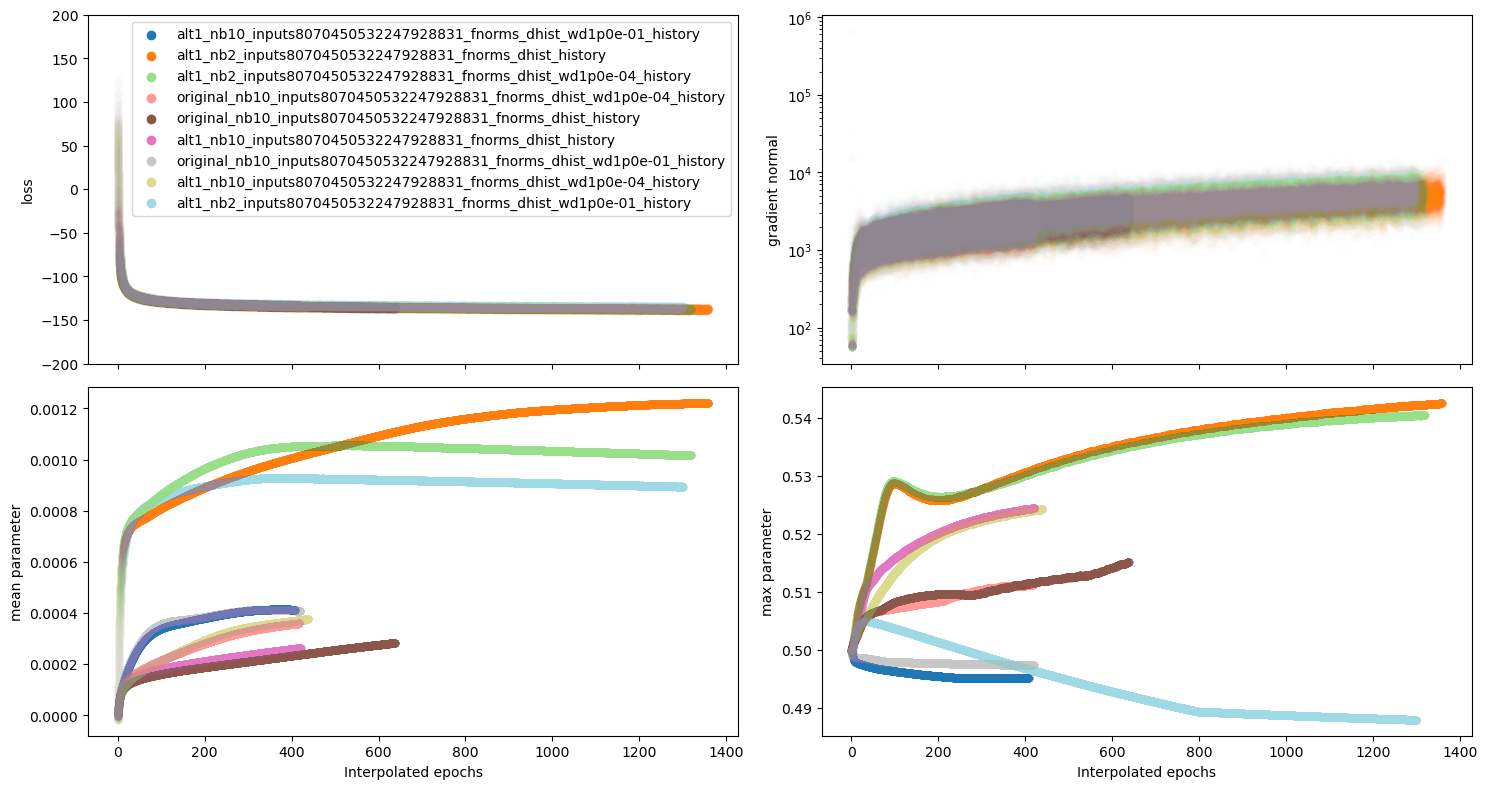

In [9]:

def plot(file_names, colours=None, labels=None):
    fig, ax_arr = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
    if colours is None:
        colours = plt.cm.tab20(np.linspace(0, 1, len(file_names)), alpha=0.01)
    if labels is None:
        labels = [os.path.basename(f).replace("ShowerFlow_", "")[:-4] for f in file_names]
    for p, path in enumerate(file_names):
        loaded = np.load(path)
        
        epochs, points_per_epoch = np.unique(loaded[0], return_counts=True)
        interpolate_epochs = np.concatenate([np.linspace(e, e+1, p+1)[:-1] for e, p in zip(epochs, points_per_epoch)])
        xs = interpolate_epochs
        ys_dict = {"loss": loaded[1], "gradient normal": loaded[4], "mean parameter": loaded[2], "max parameter": loaded[3]}
        for i, name in enumerate(ys_dict):
            ys = ys_dict[name]
            ax = ax_arr.flatten()[i]
            ax.set_ylabel(name)
            if i > 1:
                ax.set_xlabel("Interpolated epochs")
            ax.scatter(xs, ys, c=colours[p], edgecolor=(0,0,0,0))
            ax.scatter([], [], c=(*colours[p][:3], 1.), label=labels[p])
    ax_arr[0,0].legend()
    ax_arr[0,0].set_ylim(-200, 200)
    ax_arr[0, 1].semilogy()
    plt.tight_layout()
plot(files)

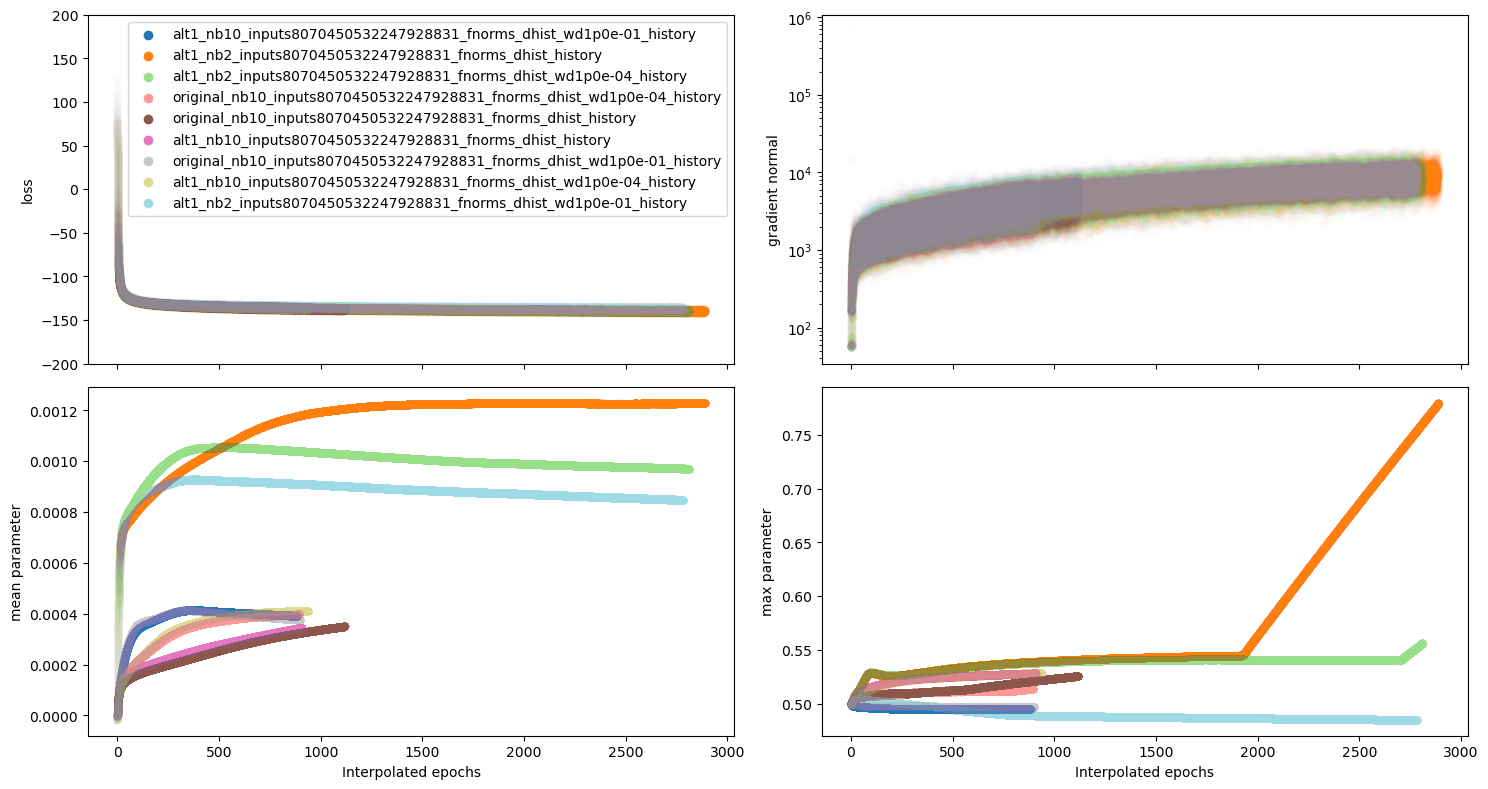

In [11]:
plot(files)